In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
# on github clickon raw then copy link and paste here
url="https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv"
res=requests.get(url,allow_redirects=True)
with open('data.csv','wb') as file:
    file.write(res.content)
    

In [3]:
data=pd.read_csv("data.csv")

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.shape
data.Ram.value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [6]:
data.isnull()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()
data.duplicated().sum()

0

In [8]:
# data.drop(columns=["Unnamed: 0"],inplace=True)
# data.head()

In [9]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
data["Ram"]=data["Ram"].str.replace("GB","")
data.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
data["Weight"]=data["Weight"].str.replace("kg","")
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
# to convert object type to int and float
data["Ram"]=data["Ram"].astype("int32")
data["Weight"]=data["Weight"].astype("float32")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

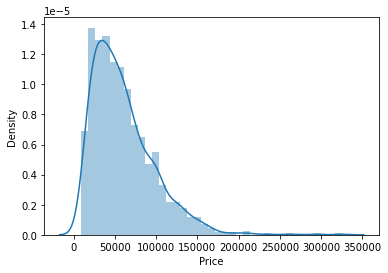

In [13]:
# for unvariante plot
sns.distplot(data["Price"])



<AxesSubplot:xlabel='Price', ylabel='Count'>

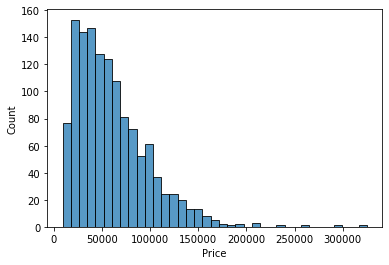

In [14]:
sns.histplot(data["Price"])

In [15]:
data["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [16]:
# sns.displot(data["Price"])
data["Company"].value_counts()

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
LG             3
Chuwi          3
Fujitsu        3
Google         3
Huawei         2
Name: Company, dtype: int64

<AxesSubplot:>

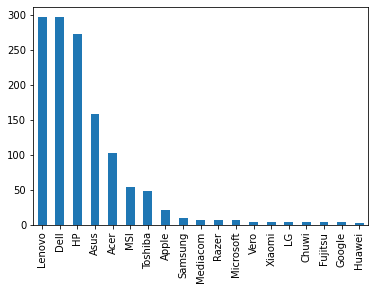

In [17]:
data["Company"].value_counts().plot(kind="bar")

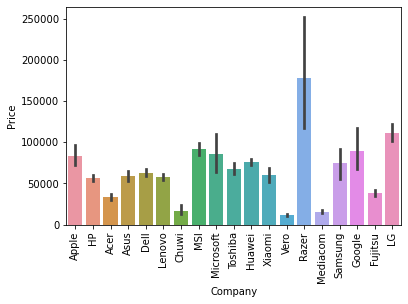

In [18]:
sns.barplot(x=data["Company"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [19]:
data["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

<AxesSubplot:>

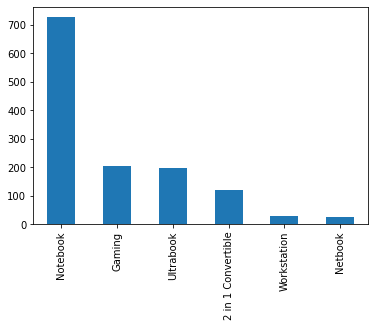

In [20]:
# sns.set(rc={"figure.figsize":(10,10)})
data["TypeName"].value_counts().plot(kind="bar")

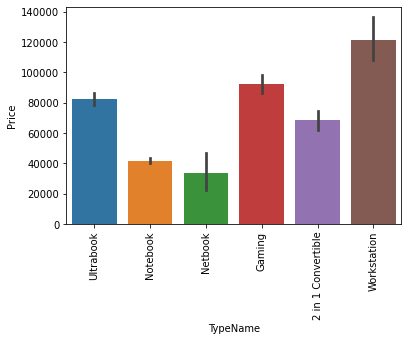

In [21]:
sns.barplot(x=data["TypeName"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [22]:
# sns.lineplot(data=data,x="Inches",y="Price")

In [23]:
# sns.distplot(data["Inches"])

In [24]:
data["touchscreen"]=data["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [25]:
data.head(200)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,48697.9200,0
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.7200,1
197,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,51095.5200,0
198,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,73473.1200,0


<AxesSubplot:>

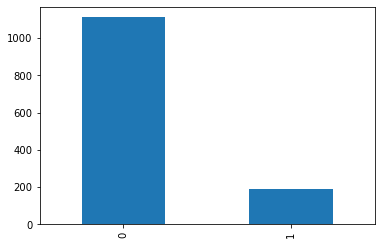

In [26]:
data["touchscreen"].value_counts().plot(kind="bar")


<AxesSubplot:xlabel='touchscreen', ylabel='Price'>

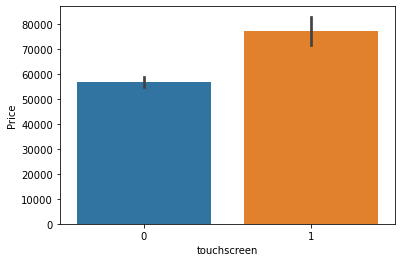

In [27]:
sns.barplot(x=data["touchscreen"],y=data["Price"])

In [28]:
data["IPS Panel"]= data["ScreenResolution"].apply(lambda x:1 if "IPS Panel" in x else 0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [29]:
data["IPS Panel"].value_counts()

0    938
1    365
Name: IPS Panel, dtype: int64

<AxesSubplot:xlabel='IPS Panel', ylabel='Price'>

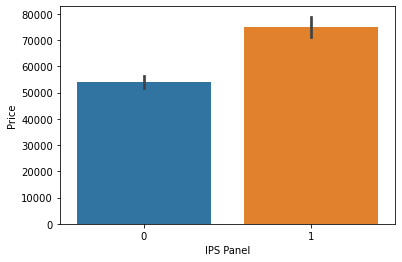

In [30]:
sns.barplot(x=data["IPS Panel"],y=data["Price"])

In [31]:
data.shape

(1303, 13)

In [32]:
new=data["ScreenResolution"].str.split("x",n=1,expand=True)
data["x_res"]=new[0]
data["y_res"]=new[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [33]:
data["x_res"]=data["x_res"].astype(str).str.replace(',','').str.findall(r'\d+').apply(lambda x:x[0])
# data.head()

In [34]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [36]:
data["x_res"]=data["x_res"].astype("int32")
data["y_res"]=data["y_res"].astype("int32")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [37]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


<AxesSubplot:>

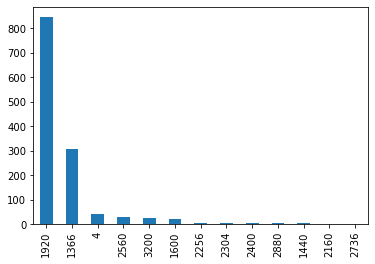

In [38]:
data["x_res"].value_counts().plot(kind="bar")

<AxesSubplot:>

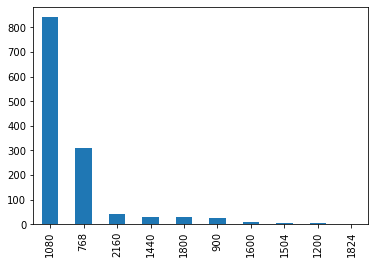

In [39]:
data["y_res"].value_counts().plot(kind="bar")

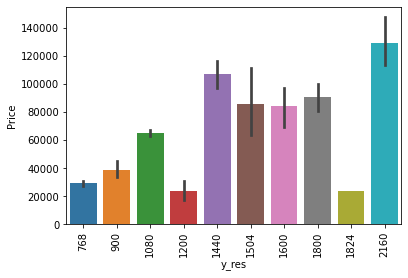

In [40]:
sns.barplot(x=data["y_res"],y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [41]:
data.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.191226
IPS Panel      0.252208
x_res          0.083832
y_res          0.552809
Name: Price, dtype: float64

<AxesSubplot:>

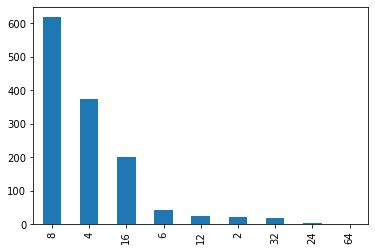

In [42]:
data["Ram"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Ram', ylabel='Price'>

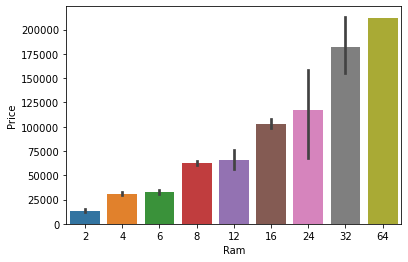

In [43]:
sns.barplot(x=data["Ram"],y=data["Price"])

In [44]:
data["ppi"]=(((data["x_res"]**2) +(data["y_res"]**2))**.5/data["Inches"]).astype("float")

In [45]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [46]:
data.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.191226
IPS Panel      0.252208
x_res          0.083832
y_res          0.552809
ppi            0.348331
Name: Price, dtype: float64

<AxesSubplot:xlabel='ppi', ylabel='Price'>

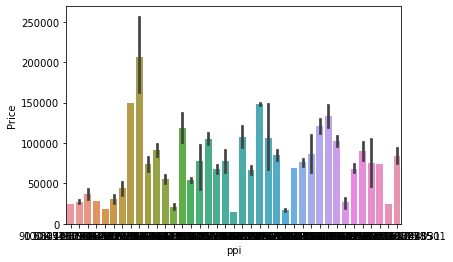

In [47]:
sns.barplot(x=data["ppi"],y=data["Price"])

In [48]:
data.drop(["ScreenResolution"],axis=1,inplace=True)

In [49]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


<AxesSubplot:>

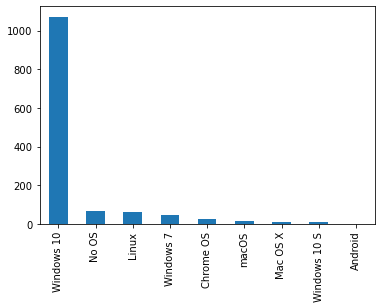

In [50]:
data["OpSys"].value_counts().plot(kind="bar")

In [51]:
data.drop(["Inches"],axis=1,inplace=True)
data.drop(["x_res"],axis=1,inplace=True)
data.drop(["y_res"],axis=1,inplace=True)



In [52]:
data.head(20)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670
6,Apple,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624
7,Apple,Ultrabook,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940
8,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512
9,Acer,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512


In [53]:
data["CPU Name"] =data["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [54]:
def fetch_processor(text):
    if text=="Intel Core i5" or text=="Intel Core i7" or text=="Intel Core i3":
        return text;
    else:
        if(text.split()[0]=="Intel") :
            return "Other Intel Processor"
        else:
            return 'AMD Processor'

In [55]:
data["CPU Brand"]=data["CPU Name"].apply(fetch_processor)

In [56]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [57]:
data["CPU Brand"].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU Brand, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

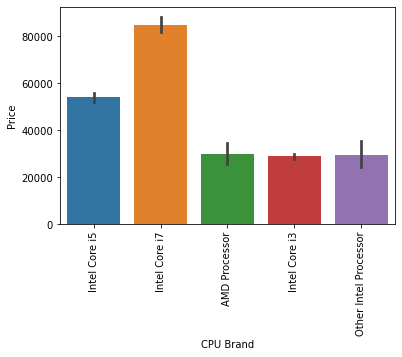

In [58]:
sns.barplot(x="CPU Brand",y="Price",data=data)
plt.xticks(rotation="vertical")

In [59]:
data.corr()["Price"]

Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.191226
IPS Panel      0.252208
ppi            0.348331
Name: Price, dtype: float64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   touchscreen  1303 non-null   int64  
 10  IPS Panel    1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  CPU Name     1303 non-null   object 
 13  CPU Brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(8)
memory usage: 132.5+ KB


In [61]:
data.drop(["Cpu","CPU Name"],axis=1,inplace=True)

In [62]:
data.head(30)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
5,Acer,Notebook,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor
6,Apple,Ultrabook,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7
7,Apple,Ultrabook,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5
8,Asus,Ultrabook,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7
9,Acer,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5


In [63]:
data.shape

(1303, 12)

In [64]:
# data["Gpu"].value_counts()

In [65]:
data["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
6

In [66]:
data["Memory"] =data["Memory"].astype(str).replace('\.0','',regex=True)
data["Memory"]=data["Memory"].str.replace("GB","")
data["Memory"]=data["Memory"].str.replace("TB","000")
new =data["Memory"].str.split("+",n=1,expand=True)
data["first"]=new[0]
data["first"]=data["first"].str.strip()
data["second"]=new[1]
data["Layer1HDD"]=data["first"].apply(lambda x:1 if "HDD" in x else 0)
data["Layer1SSD"]=data["first"].apply(lambda x:1 if "SSD" in x else 0)
data["Layer1Hybrid"]=data["first"].apply(lambda x:1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"]=data["first"].apply(lambda x:1 if "Falsh Storage" in x else 0)

In [67]:
data["first"]=data["first"].str.replace(r'\D','')
data["second"].fillna("0",inplace=True)
data["Layer2HDD"]=data["second"].apply(lambda x:1 if "HDD" in x else 0)
data["Layer2SSD"]=data["second"].apply(lambda x:1 if "SSD" in x else 0)
data["Layer2Hybrid"]=data["second"].apply(lambda x:1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"]=data["second"].apply(lambda x:1 if "Falsh Storage" in x else 0)

<ipython-input-67-68b349bf159b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["first"]=data["first"].str.replace(r'\D','')


In [68]:
data["second"]= data["second"].str.replace(r'\D','')
data["first"]=data["first"].astype(int)
data["second"]=data["second"].astype(int)
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

<ipython-input-68-e96646ca414d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["second"]= data["second"].str.replace(r'\D','')


In [69]:
data.head(20)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,...,0,0,0,0,0,0,500,0,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,...,0,0,0,0,0,0,0,0,0,0
7,Apple,Ultrabook,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Asus,Ultrabook,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,...,0,0,0,0,0,0,0,512,0,0
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,...,0,0,0,0,0,0,0,256,0,0


In [70]:
data.drop(["first","second","Layer1SSD","Layer1HDD","Layer1Hybrid","Layer1Flash_Storage","Layer2SSD","Layer2HDD","Layer2Hybrid","Layer2Flash_Storage"],axis=1,inplace=True)

In [71]:
data.head(50
         )

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,0,0
7,Apple,Ultrabook,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5,0,0,0,0
8,Asus,Ultrabook,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512,0,0
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,0,0


In [72]:
data.shape

(1303, 16)

In [73]:
data.corr()["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
touchscreen      0.191226
IPS Panel        0.252208
ppi              0.348331
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

In [74]:
# hybrid and flash_storage does have weak correlation
# correlation is only find for numerical columns
data.drop(["Hybrid","Flash_Storage"],axis=1,inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [75]:
data["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce GTX 980       1
AMD FirePro W6150M           1
Intel HD Graphics 530        1
AMD Radeon Pro 560           1
Nvidia GeForce 920           1
Name: Gpu, Length: 110, dtype: int64

In [76]:
new=data["Gpu"].str.split(" ",n=1,expand=True)
data["Gpu"]=new[0]
data.head()


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,128 Flash Storage,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,512 SSD,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,256 SSD,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [77]:
data["Gpu"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

<AxesSubplot:xlabel='Gpu', ylabel='Price'>

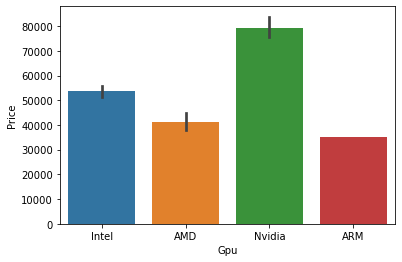

In [78]:
sns.barplot(x=data["Gpu"],y=data["Price"] )

In [79]:
data[data["Gpu"]=='ARM']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Brand,HDD,SSD
1191,Samsung,2 in 1 Convertible,4,32 Flash Storage,ARM,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0


In [80]:
data["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

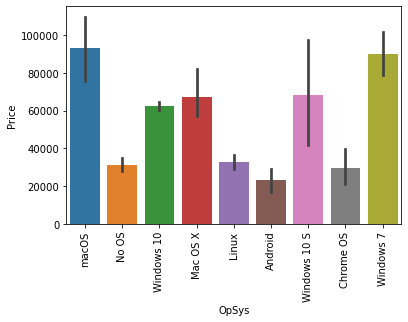

In [81]:
sns.barplot(x=data["OpSys"],y=data["Price"])
plt.xticks(rotation ="vertical")
plt.show()

In [82]:
data["os"]=data["OpSys"].str.lower().apply(lambda x:x.split()[0])
data["os"]=data["os"].replace("mac","macos")
data.head(20)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Brand,HDD,SSD,os
0,Apple,Ultrabook,8,128 SSD,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,macos
1,Apple,Ultrabook,8,128 Flash Storage,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,macos
2,HP,Notebook,8,256 SSD,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,no
3,Apple,Ultrabook,16,512 SSD,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,macos
4,Apple,Ultrabook,8,256 SSD,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,macos
5,Acer,Notebook,4,500 HDD,AMD,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0,windows
6,Apple,Ultrabook,16,256 Flash Storage,Intel,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,macos
7,Apple,Ultrabook,8,256 Flash Storage,Intel,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5,0,0,macos
8,Asus,Ultrabook,16,512 SSD,Nvidia,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512,windows
9,Acer,Ultrabook,8,256 SSD,Intel,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,windows


In [83]:
data.os.value_counts()

windows    1125
no           66
linux        62
chrome       27
macos        21
android       2
Name: os, dtype: int64

In [84]:
def process_os(text):
    if(text=="windows" or text=="macos" ):
        return text
    else:
     return "others"

In [85]:
data["os"]=data["os"].apply(process_os)

In [86]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS Panel,ppi,CPU Brand,HDD,SSD,os
0,Apple,Ultrabook,8,128 SSD,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,macos
1,Apple,Ultrabook,8,128 Flash Storage,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,macos
2,HP,Notebook,8,256 SSD,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,others
3,Apple,Ultrabook,16,512 SSD,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,macos
4,Apple,Ultrabook,8,256 SSD,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,macos


In [87]:
data.os.value_counts()

windows    1125
others      157
macos        21
Name: os, dtype: int64

<AxesSubplot:xlabel='os', ylabel='Price'>

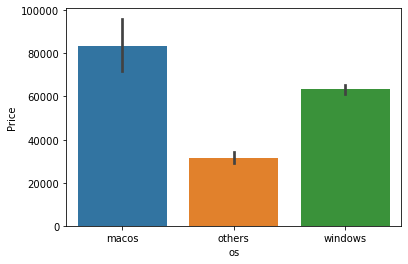

In [88]:
sns.barplot(x=data["os"],y=data["Price"])

In [89]:
data.drop(["OpSys"],inplace=True,axis=1)

In [90]:
data.shape

(1303, 14)

In [91]:
data.corr()["Price"]

Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.191226
IPS Panel      0.252208
ppi            0.348331
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

In [92]:
data.drop(["Memory"],inplace=True,axis=1)
data=data[data["Gpu"]!='ARM']
X=data.drop(["Price"],axis=1)
y=np.log(data['Price'])
X
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=2)
X_train

,Company,TypeName,Ram,Gpu,Weight,touchscreen,IPS Panel,ppi,CPU Brand,HDD,SSD,os
183,Toshiba,Notebook,8,Intel,2.00,0,0,100.454670,Intel Core i5,0,128,windows
1141,MSI,Gaming,8,Nvidia,2.40,0,0,141.211998,Intel Core i7,1000,128,windows
1049,Asus,Netbook,4,Intel,1.20,0,0,135.094211,Other Intel Processor,0,0,others
1020,Dell,2 in 1 Convertible,4,Intel,2.08,1,1,141.211998,Intel Core i3,1000,0,windows
878,Dell,Notebook,4,Nvidia,2.18,0,0,141.211998,Intel Core i5,1000,128,windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Nvidia,2.20,0,0,100.454670,Intel Core i3,500,0,windows
299,Asus,Ultrabook,16,Nvidia,1.63,0,0,141.211998,Intel Core i7,0,512,windows
493,Acer,Notebook,8,AMD,2.20,0,0,100.454670,AMD Processor,1000,0,windows
527,Lenovo,Notebook,8,Nvidia,2.20,0,0,100.454670,Intel Core i3,2000,0,others


In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [94]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [95]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn .neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
data.head(10)
data.Gpu.value_counts()


Intel     722
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

In [96]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.7862069874164844
MAE 0.2163309022678086


In [112]:
data.head()


,Company,TypeName,Ram,Gpu,Weight,Price,touchscreen,IPS Panel,ppi,CPU Brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,macos
1,Apple,Ultrabook,8,Intel,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,macos
2,HP,Notebook,8,Intel,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,others
3,Apple,Ultrabook,16,AMD,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,macos
4,Apple,Ultrabook,8,Intel,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,macos


In [97]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8590413722427941
MAE 0.17353761399294418


In [98]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8584474398063757
MAE 0.17314540340630324


In [99]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.7959726294669648
MAE 0.21355901769124147


In [100]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=Lasso(alpha=.001)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.7882637769720096
MAE 0.21689399695933212


In [101]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8035264561008109
MAE 0.19333004984590568


In [102]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=SVR(kernel='rbf',C=10000,epsilon=.1)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8323511342080117
MAE 0.19328638492801875


In [103]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8836335752368065
MAE 0.15909769030350035


In [104]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=ExtraTreesRegressor()
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8615320356849938
MAE 0.1635155765810308


In [105]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=GradientBoostingRegressor()
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.869940498328845
MAE 0.17410108828281176


In [106]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=AdaBoostRegressor()
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.7963595762564215
MAE 0.23029088809758155


In [107]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=.5)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8813074983869287
MAE 0.1539833720677541


In [108]:
from sklearn.ensemble import VotingRegressor ,StackingRegressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
rf=RandomForestRegressor(n_estimators=350,random_state=3,max_samples=.5,max_features=.75,max_depth=15)
gbdt=GradientBoostingRegressor(n_estimators=100,max_features=.5)
# xgb=XGBRegressor()
# lr=LinearRegression()
et=ExtraTreesRegressor(n_estimators=100,random_state=3,max_depth=10,max_features=.75,max_samples=.5)
step2=VotingRegressor([('rf',rf),('gbdt',gbdt),('et',et)],weights=[5,1,1])
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8866058754571261
MAE 0.16182993835012652


In [109]:
from sklearn.ensemble import VotingRegressor ,StackingRegressor
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
rf=RandomForestRegressor(n_estimators=350,random_state=3,max_samples=.5,max_features=.75,max_depth=15)
gbdt=GradientBoostingRegressor(n_estimators=100,max_features=.5)
# xgb=XGBRegressor()
# lr=LinearRegression()
et=ExtraTreesRegressor(n_estimators=100,random_state=3,max_depth=10,max_features=.75,max_samples=.5)
estimators=[
 ('rf',rf),('gbdt',gbdt),('et',et)   
]
# step2=VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])
step2=StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))
pipe=Pipeline([('step1',step1),
              ('step2',step2)])

pipe.fit(X_train,y_train);
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 score 0.8812460576330605
MAE 0.16681936490659918


In [110]:
pipe



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegressor(max_depth=15,
                                                                      max_features=0.75,
                                                                      max_samples=0.5,
                                                                      n_estimators=350,
                                                                      random_state=3)),
                                               ('gbdt',
                                                Grad

In [111]:
import pickle
pickle.dump(data,open('data.pkl','wb'))

pickle.dump(pipe,open('pipe.pkl','wb'))
